In [1]:
using GLM
using DataFrames
using Plots

In [2]:
f(x) = 2 + 3x + 5x^2 - 3x^3
data = []
for i in -3:0.1:3
    x = i + rand(Float64)
    xi = [x, x^2, x^3]
    yi = f(i) + rand(Float64)
    push!(data, (xi, yi))
end

In [3]:
df = DataFrame(x1=[d[1][1] for d in data], x2=[d[1][2] for d in data], x3=[d[1][3] for d in data], y=[d[2] for d in data])

Row,x1,x2,x3,y
,Float64,Float64,Float64,Float64
1,-2.89471,8.37933,-24.2557,119.404
2,-2.65315,7.03921,-18.6761,108.734
3,-2.6426,6.98332,-18.4541,99.3582
4,-1.89207,3.57992,-6.77346,90.3434
5,-2.40169,5.76811,-13.8532,81.3999
6,-1.74516,3.0456,-5.31506,73.2227
7,-2.10855,4.44599,-9.37461,65.6308
8,-1.97966,3.91905,-7.75837,58.4427
9,-1.91662,3.67344,-7.04059,52.433


In [4]:
model = lm(@formula(y ~ x1 + x2 + x3), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x1 + x2 + x3

Coefficients:
─────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)   4.30349    1.6502      2.61    0.0116   0.999027    7.60795
x1           -5.32325    1.3391     -3.98    0.0002  -8.00475    -2.64175
x2            7.12914    0.427151   16.69    <1e-22   6.27379     7.9845
x3           -2.01691    0.201383  -10.02    <1e-13  -2.42017    -1.61364
─────────────────────────────────────────────────────────────────────────

In [5]:
x_range = collect(-3:0.1:3)
y_pred = predict(model, DataFrame(x1=x_range, x2=x_range.^2, x3=x_range.^3))

61-element Vector{Union{Missing, Float64}}:
 138.8920246386304
 128.88736086644545
 119.37622174983308
 110.34650584874285
 101.78611172312418
  93.68293793292658
  86.02488303809959
  78.7998455985927
  71.99572417435542
  65.6004173253372
  59.60182361148759
  53.987841592756055
  48.74636982909214
   ⋮
   6.091563264525214
   6.038314116009321
   5.885619060591523
   5.621376658221317
   5.233485468848212
   4.7098440524216905
   4.038350968891268
   3.2069047782064333
   2.203404040316696
   1.0157473151715632
  -0.36816683727948707
  -1.9604398570869481

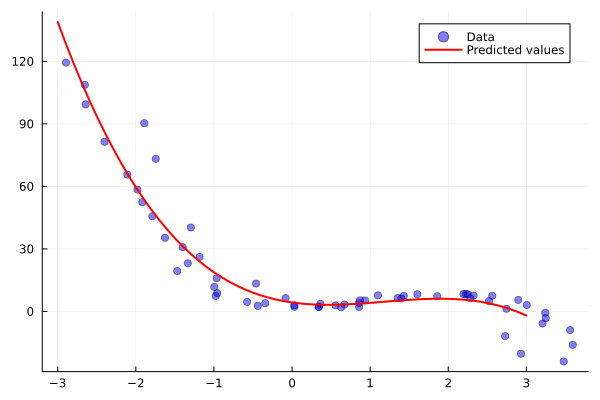

In [6]:
scatter(df.x1, df.y, label="Data", color=:blue, alpha=0.5)
plot!(x_range, y_pred, label="Predicted values", color=:red, linewidth=2)

In [7]:
coef(model)

4-element Vector{Float64}:
  4.303490042129834
 -5.323250673536238
  7.129144705404655
 -2.016906675083332